<a href="https://colab.research.google.com/github/Leelddd/alchemy-101/blob/master/dlwp/6_1_working_with_text_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6.1 Working with text data

### 6.1.1 One-hot encoding of words and characters

word-level one-hot encoding

In [0]:
import numpy as np

samples = ['the cat sat on the mat.', 'the dog ate my homework']

token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

max_length = 10
results = np.zeros(shape=(len(samples), 
                          max_length, 
                          max(token_index.values()) + 1)
                  )

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1

In [7]:
token_index, results[0]

({'ate': 7,
  'cat': 2,
  'dog': 6,
  'homework': 9,
  'mat.': 5,
  'my': 8,
  'on': 4,
  'sat': 3,
  'the': 1},
 array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))

character-level one-hot encoding

In [15]:
string.printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [0]:
import string

samples = ['the cat sat on the mat.', 'the dog ate my homework']
characters = string.printable
token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))

for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
#         print(character, i, j, index)
        results[i, j, index] = 1

In [0]:
for i in range(len(samples[0])):
    assert(sum(results[0][i]) == 1)

In [62]:
results[0][1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

using keras for one-hot encoding

In [65]:
from keras.preprocessing.text import Tokenizer

samples = ['a cat sat on the mat.', 'the dog ate my homework mat mat']

tokenizer = Tokenizer(num_words=5)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index
len(word_index), one_hot_results, word_index

(10, array([[0., 1., 1., 1., 1.],
        [0., 1., 1., 0., 0.]]), {'a': 3,
  'ate': 8,
  'cat': 4,
  'dog': 7,
  'homework': 10,
  'mat': 1,
  'my': 9,
  'on': 6,
  'sat': 5,
  'the': 2})

In [0]:
dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality
        result[i, j, index] = 1

In [50]:
hash('hello'), hash('hello')

(-730597258540427349, -730597258540427349)

### 6.1.2 Using word embeddings

In [0]:
from keras.layers import Embedding

embedding_layer = Embedding(1000, 64)

In [53]:
!pip install numpy==1.16.2

     |████████████████████████████████| 17.3MB 3.4MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: numpy 1.16.3
    Uninstalling numpy-1.16.3:
      Successfully uninstalled numpy-1.16.3


In [1]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

Using TensorFlow backend.


In [5]:
len(x_train[0]),len(x_train)

(218, 25000)

In [0]:
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [8]:
len(x_train), len(x_train[0])

(25000, 20)

In [11]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 4s 219us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 2s 89us/step - loss: 0.5657 - acc: 0.

In [4]:
!wget http://mng.bz/0tIo --no-check-certificate

--2019-05-03 08:26:24--  http://mng.bz/0tIo
Resolving mng.bz (mng.bz)... 35.166.24.88
Connecting to mng.bz (mng.bz)|35.166.24.88|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mng.bz/0tIo [following]
--2019-05-03 08:26:24--  https://mng.bz/0tIo
Connecting to mng.bz (mng.bz)|35.166.24.88|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 301 
Location: http://s3.amazonaws.com/text-datasets/aclImdb.zip [following]
--2019-05-03 08:26:24--  http://s3.amazonaws.com/text-datasets/aclImdb.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.137.86
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.137.86|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60711700 (58M) [application/zip]
Saving to: ‘0tIo’

0tIo                100%[===================>]  57.90M  74.0MB/s    in 0.8s    

2019-05-03 08:26:25 (74.0 MB/s) - ‘0tIo’ saved [60711700/60711700]

In [0]:
!unzip 0tIo -d imdb

In [7]:
ls imdb/aclImdb/

neg/  pos/  urls_neg.txt  urls_pos.txt


In [0]:
import os

imdb_dir = 'imdb/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [9]:
max([len(text) for text in texts]),texts[0], len(labels), len(texts)

(13704,
 "Rebar is an astronaut who goes on the world's first space mission to Saturn, but of course this being a horror movie things turn ugly and he returns to earth as the only survivor. Stricken with some bizarre condition that causes him to slowly melt and lose his mind unless he regularly consumes human flesh, he kills what apparently is the only nurse in the hospital and escapes to the neighboring town to stalk more victims.<br /><br />I liked the premise and the monster and gore effects are actually pretty good, but the space scenes are just pasted together out of stock NASA footage and the hospital looks curiously like a warehouse. A very weak script, little character development and overall poor acting keep this one from rising above being anything other than a mediocre slasher flick with the novelty of having a living candle as the killer, and more or less only has its gore effects to hold your interest.<br /><br />4 out of 10, strictly for the most die-hard monster movie fa

In [10]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)

Using TensorFlow backend.


In [0]:
sequences = tokenizer.texts_to_sequences(texts)

In [34]:
len(labels)

25000

In [13]:
word_index = tokenizer.word_index
print('Find %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor and label tensor', data.shape, labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Find 88582 unique tokens.
Shape of data tensor and label tensor (25000, 100) (25000,)


In [0]:
# wrap the last several code block
def load_data(training_samples=200, validation_samples=10000, maxlen=100, max_words=10000):
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    word_index = tokenizer.word_index
    print('Find %s unique tokens.' % len(word_index))

    data = pad_sequences(sequences, maxlen=maxlen)

    labels1 = np.asarray(labels)
    print('Shape of data tensor and label tensor', data.shape, labels1.shape)

    indices = np.arange(data.shape[0])
    np.random.shuffle(indices)
    data = data[indices]
    labels1 = labels1[indices]

    x_train = data[:training_samples]
    y_train = labels1[:training_samples]
    x_val = data[training_samples: training_samples + validation_samples]
    y_val = labels1[training_samples: training_samples + validation_samples]
    return x_train, y_train, x_val, y_val

In [14]:
!wget https://nlp.stanford.edu/data/glove.6B.zip

--2019-05-03 08:29:29--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  9.18MB/s    in 2m 15s  

2019-05-03 08:31:45 (6.07 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [15]:
!unzip glove.6B.zip -d glove.6B

Archive:  glove.6B.zip
  inflating: glove.6B/glove.6B.50d.txt  
  inflating: glove.6B/glove.6B.100d.txt  
  inflating: glove.6B/glove.6B.200d.txt  
  inflating: glove.6B/glove.6B.300d.txt  


In [16]:
!ls glove.6B

glove.6B.100d.txt  glove.6B.200d.txt  glove.6B.300d.txt  glove.6B.50d.txt


In [17]:
!cat glove.6B/glove.6B.100d.txt | head -n 5

the -0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 -0.06731 0.30906 -0.26384 -0.13231 -0.20757 0.33395 -0.33848 -0.31743 -0.48336 0.1464 -0.37304 0.34577 0.052041 0.44946 -0.46971 0.02628 -0.54155 -0.15518 -0.14107 -0.039722 0.28277 0.14393 0.23464 -0.31021 0.086173 0.20397 0.52624 0.17164 -0.082378 -0.71787 -0.41531 0.20335 -0.12763 0.41367 0.55187 0.57908 -0.33477 -0.36559 -0.54857 -0.062892 0.26584 0.30205 0.99775 -0.80481 -3.0243 0.01254 -0.36942 2.2167 0.72201 -0.24978 0.92136 0.034514 0.46745 1.1079 -0.19358 -0.074575 0.23353 -0.052062 -0.22044 0.057162 -0.15806 -0.30798 -0.41625 0.37972 0.15006 -0.53212 -0.2055 -1.2526 0.071624 0.70565 0.49744 -0.42063 0.26148 -1.538 -0.30223 -0.073438 -0.28312 0.37104 -0.25217 0.016215 -0.017099 -0.38984 0.87424 -0.72569 -0.51058 -0.52028 -0.1459 0.8278 0.27062
, -0.10767 0.11053 0.59812 -0.54361 0.67396 0.10663 0.038867 0.35481 0.06351 -0.094189 0.15786 -0.81665 0.14172 0.21939 0.58505 -0.52158 

In [18]:
glove_dir = 'glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('find %s word vectors.' % len(embeddings_index))

find 400000 word vectors.


In [0]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

def train_with_pre():
    model = Sequential()
    model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    
    model.layers[0].set_weights([embedding_matrix])
    model.layers[0].trainable = False
    
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
    return model, history
#     model.save_weights('pre_trained_glove_model.h5')

In [51]:
x_train, y_train, x_val, y_val = load_data(200, 10000)
_. history = train_with_pre()

Find 88582 unique tokens.
Shape of data tensor and label tensor (25000, 100) (25000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_8 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 1.4824 - acc: 0.4950 - val_loss: 0.8024 - val_acc: 0.495

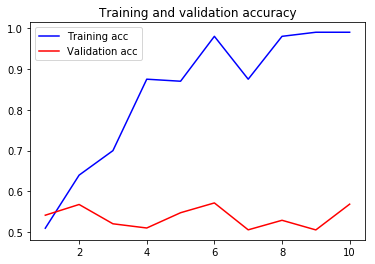

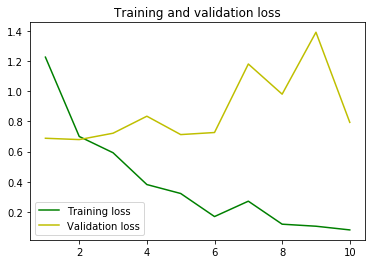

In [52]:
plot(history.history)

In [57]:
x_train, y_train, x_val, y_val = load_data(10000, 2000)
_, history = train_with_pre()

Find 88582 unique tokens.
Shape of data tensor and label tensor (25000, 100) (25000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_11 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 10000 samples, validate on 2000 samples
Epoch 1/10
10000/10000 [==============================] - 1s 143us/step - loss: 0.7142 - acc: 0.4957 - val_loss: 0.6932 - val_acc

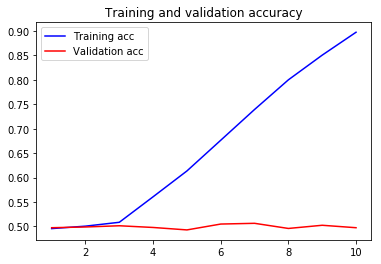

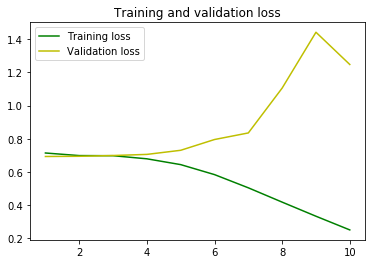

In [58]:
plot(history.history)

In [0]:
import matplotlib.pyplot as plt

def plot(history):
    acc = history['acc']
    val_acc = history['val_acc']
    loss = history['loss']
    val_loss = history['val_loss']
    
    epochs = range(1, len(acc)+1)
    
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    
    plt.plot(epochs, loss, 'g', label='Training loss')
    plt.plot(epochs, val_loss, 'y', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

training the same model without pretrained word embeddings

In [0]:
def train_without_pre():
    model = Sequential()
    model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
    return model, history
    # model.save_weights('pre_trained_glove_model.h5')

In [48]:
x_train, y_train, x_val, y_val = load_data(200, 10000)

Find 88582 unique tokens.
Shape of data tensor and label tensor (25000, 100) (25000,)


In [49]:
_, history1 = train_without_pre()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_7 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 0.6843 - acc: 0.5400 - val_loss: 0.7057 - val_acc: 0.5053
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4859 - a

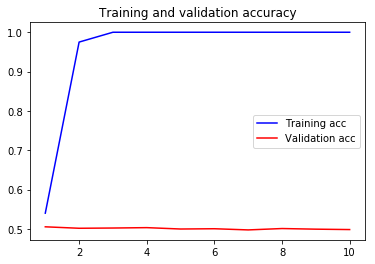

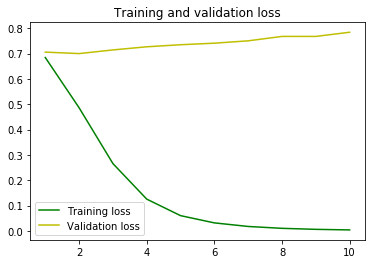

In [50]:
plot(history1.history)

In [45]:
x_train, y_train, x_val, y_val = load_data(5000, 5000)

Find 88582 unique tokens.
Shape of data tensor and label tensor (25000, 100) (25000,)


In [46]:
_, history1 = train_without_pre()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_6 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 1s 214us/step - loss: 0.6948 - acc: 0.4948 - val_loss: 0.6938 - val_acc: 0.4962
Epoch 2/10
5000/5000 [==============================] - 1s 141us/step - loss: 0.

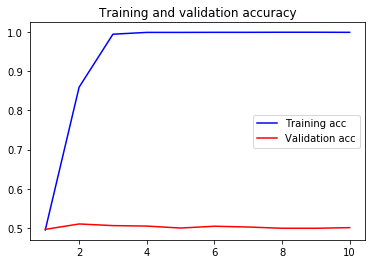

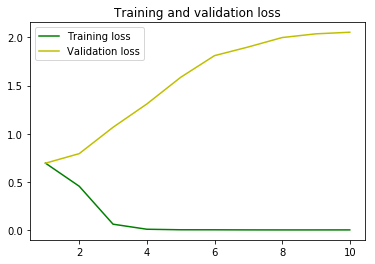

In [47]:
plot(history1.history)

tokenizing the data of the test set

In [0]:
import os

imdb_dir = 'imdb/aclImdb'
train_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [60]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 42us/step


[0.8019074128246307, 0.56396]